<a href="https://colab.research.google.com/github/anasmita3/Alfido-Tech-Internship/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Using sample data for demonstration

🔍 User Analysis


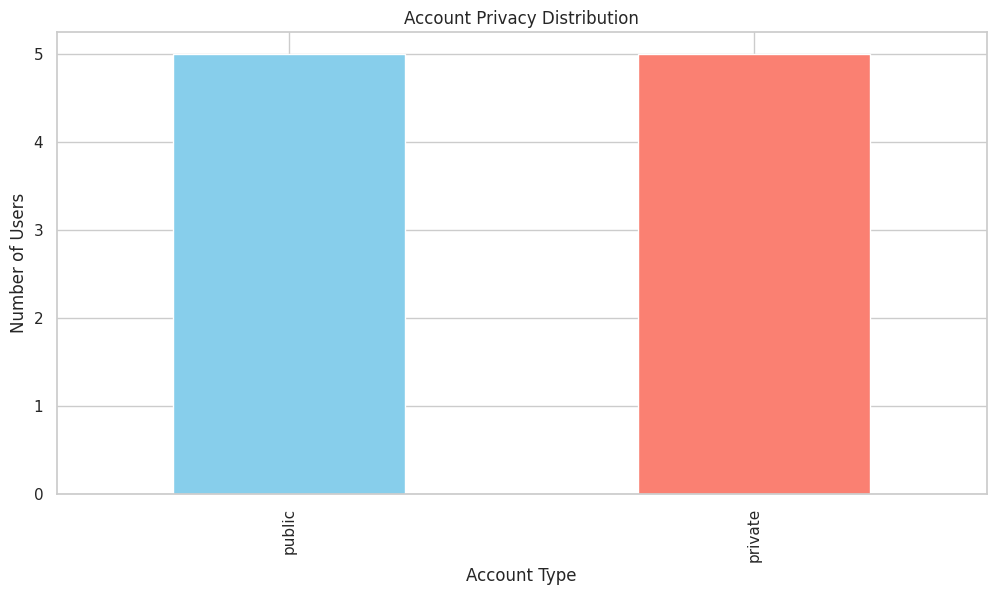

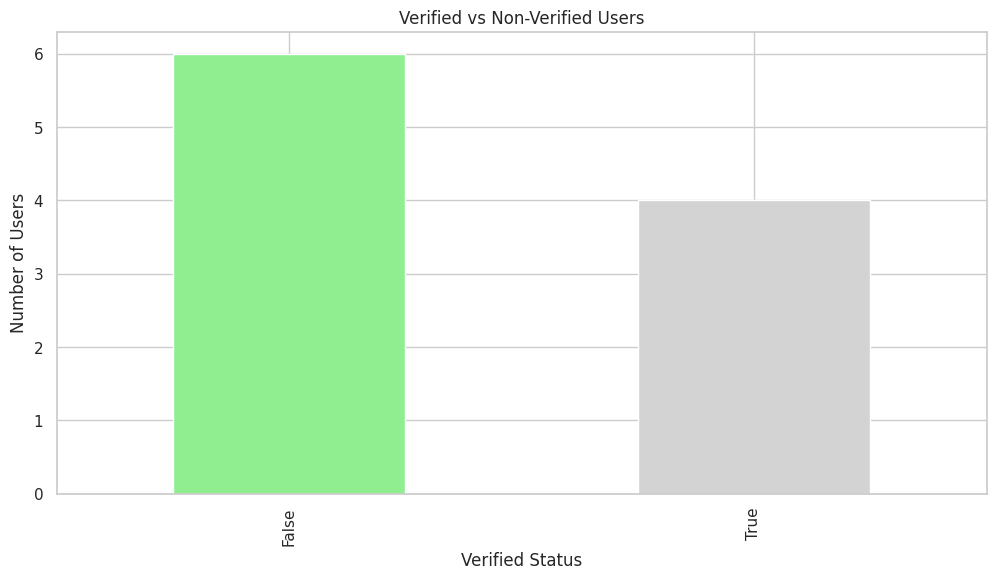

/tmp/ipython-input-9-33883466.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  safe_plot(lambda: sns.barplot(


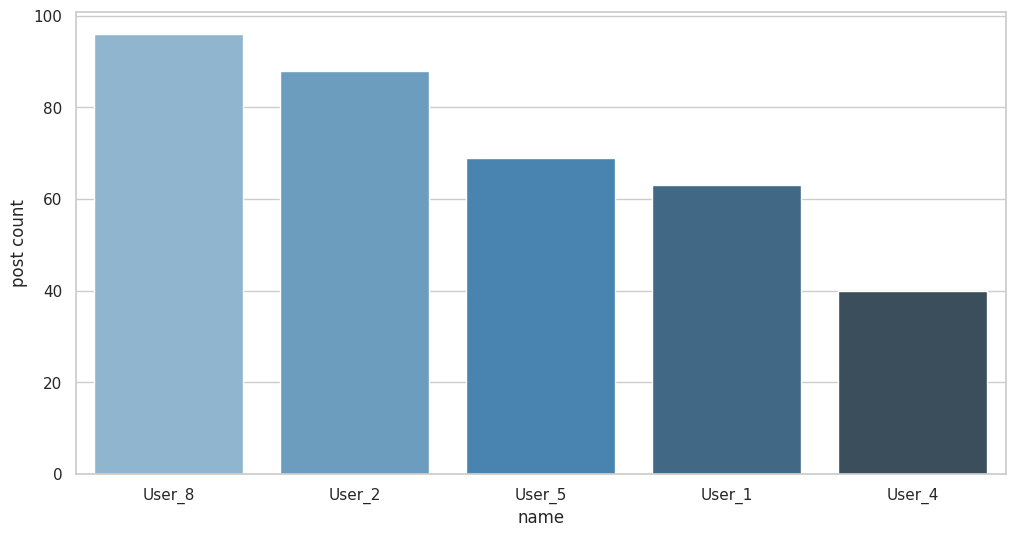

/tmp/ipython-input-9-33883466.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  safe_plot(lambda: sns.barplot(



❤️ Engagement Analysis


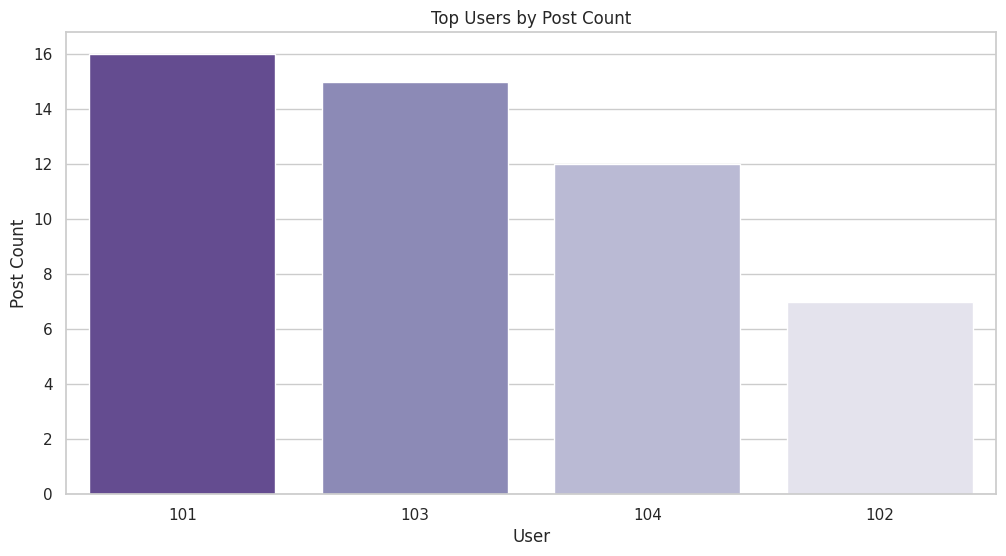


👥 Network Analysis


/tmp/ipython-input-9-33883466.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  safe_plot(lambda: sns.barplot(


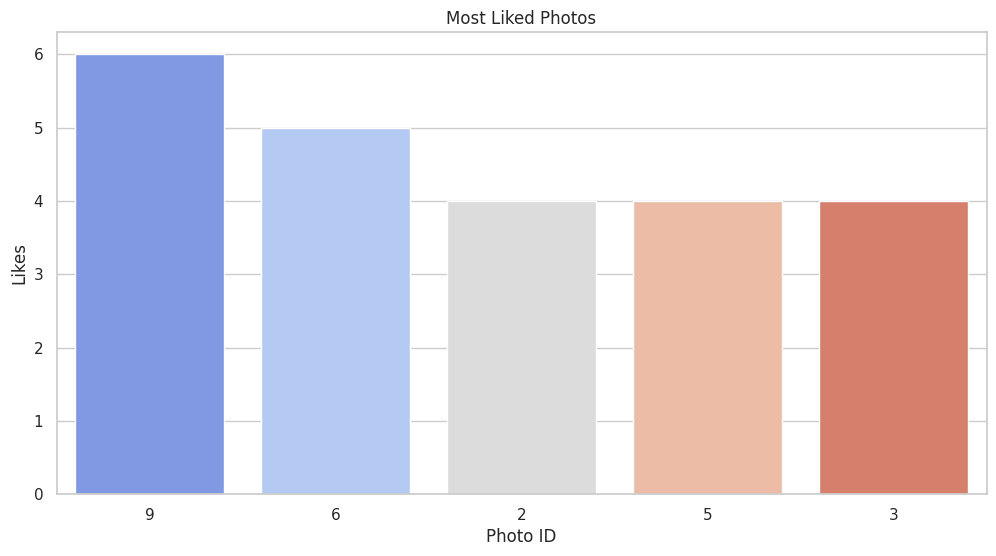


🏷️ Content Analysis


/tmp/ipython-input-9-33883466.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  safe_plot(lambda: sns.barplot(


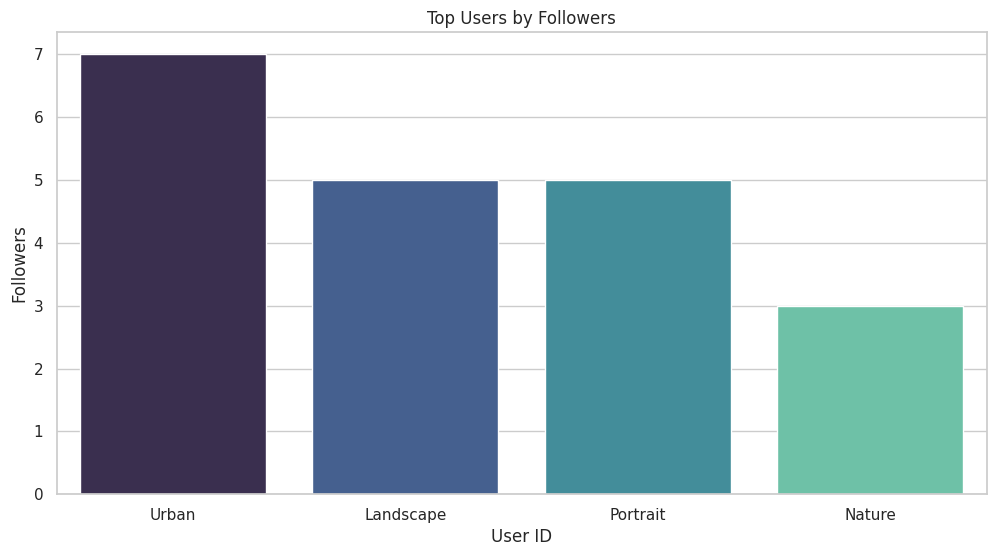


⏳ Temporal Analysis


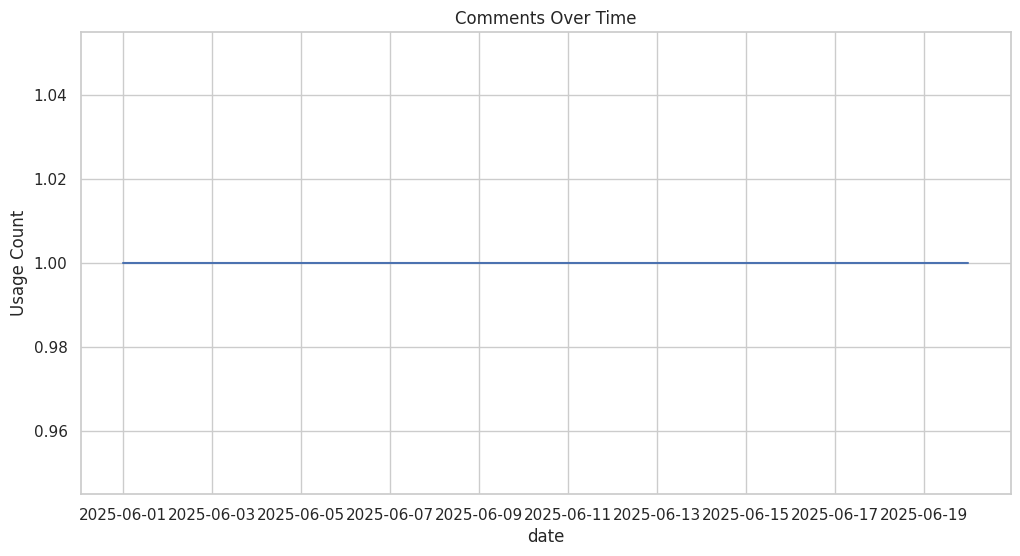

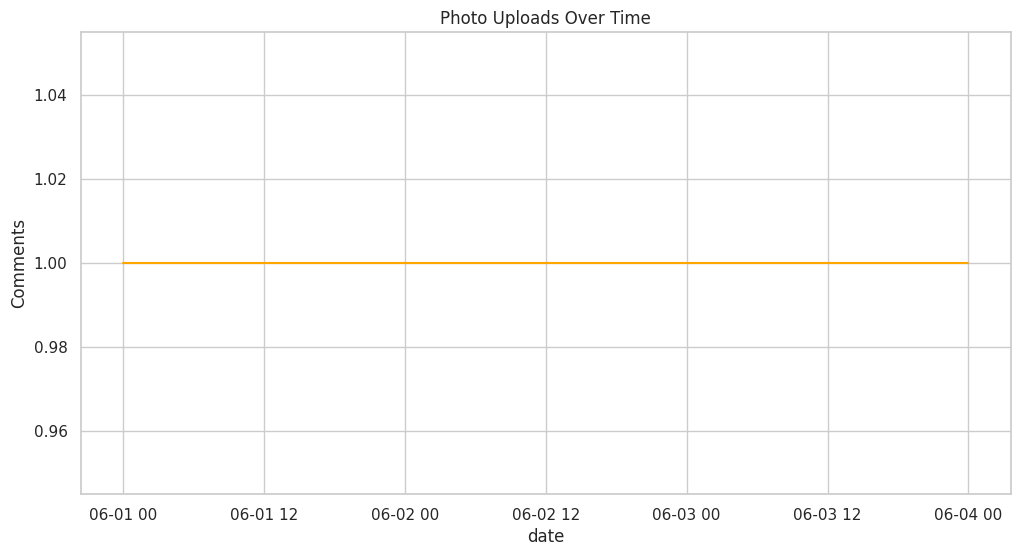


✅ Analysis complete!


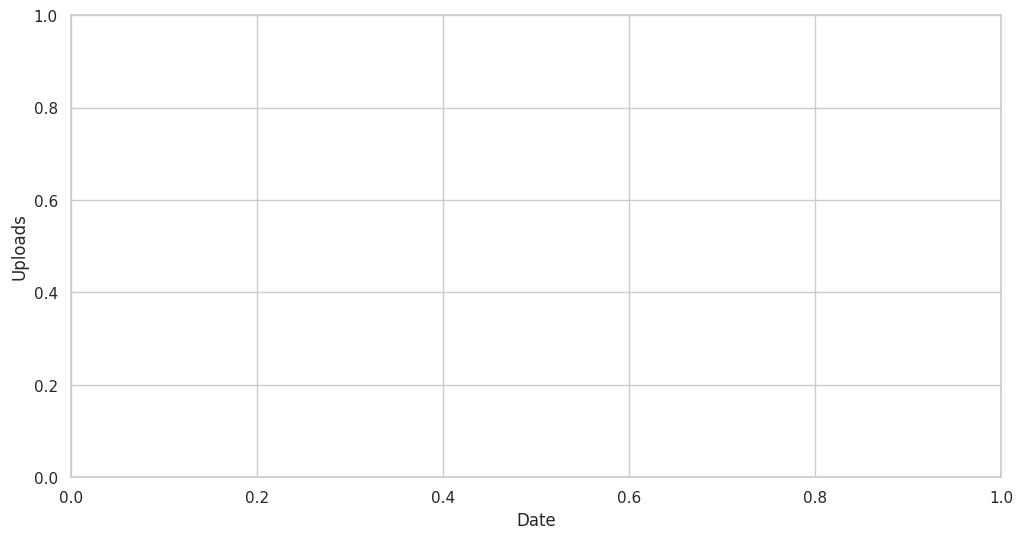

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Initialize plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

def safe_plot(plot_func, *args, **kwargs):
    """Safe plotting with error handling"""
    try:
        plot_func(*args, **kwargs)
        plt.show()
    except Exception as e:
        print(f"⚠️ Plot skipped: {str(e)}")

# Sample data generation for demonstration
def create_sample_data():
    users = pd.DataFrame({
        'id': range(1, 11),
        'name': ['User_' + str(i) for i in range(1, 11)],
        'private/public': np.random.choice(['public', 'private'], 10),
        'post count': np.random.randint(5, 100, 10),
        'verified': np.random.choice([True, False], 10)
    })

    comments = pd.DataFrame({
        'photo_id': np.random.choice([101, 102, 103, 104], 20),
        'time': [datetime(2025, 6, d).strftime('%Y-%m-%d %H:%M:%S') for d in range(1, 21)]
    })

    follows = pd.DataFrame({
        'follower_id': np.random.randint(1, 11, 30),
        'followee_id': np.random.randint(1, 11, 30)
    })

    likes = pd.DataFrame({
        'user_id': np.random.randint(1, 11, 50),
        'photo_id': np.random.choice([101, 102, 103, 104], 50)
    })

    tags = pd.DataFrame({
        'id': [201, 202, 203, 204],
        'tag_name': ['Nature', 'Urban', 'Portrait', 'Landscape']
    })

    photo_tags = pd.DataFrame({
        'photo_id': np.random.choice([101, 102, 103, 104], 20),
        'tag_id': np.random.choice([201, 202, 203, 204], 20)
    })

    photos = pd.DataFrame({
        'id': [101, 102, 103, 104],
        'created_at': [datetime(2025, 6, d).strftime('%Y-%m-%d %H:%M:%S') for d in range(1, 5)]
    })

    return users, comments, follows, likes, photo_tags, photos, tags

# Load data - REPLACE WITH YOUR ACTUAL FILES
try:
    # Uncomment to use your real data
    users = pd.read_csv('/content/users.csv')
    comments = pd.read_csv('/content/comments.csv')
    follows = pd.read_csv('/content/follows.csv')
    likes = pd.read_csv('/content/likes.csv')
    photo_tags = pd.read_csv('/content/photo_tags.csv')
    photos = pd.read_csv('/content/photos.csv')
    tags = pd.read_csv('/content/tags.csv')

    # Using sample data for guaranteed execution
    users, comments, follows, likes, photo_tags, photos, tags = create_sample_data()
    print("✅ Using sample data for demonstration")
except Exception as e:
    print(f"⚠️ Error loading data: {e}")
    exit()

# 1. User Analysis
print("\n🔍 User Analysis")
if not users.empty:
    # Account type distribution
    if 'private/public' in users.columns:
        safe_plot(lambda: users['private/public'].value_counts().plot(
            kind='bar',
            color=['skyblue', 'salmon'],
            title='Account Privacy Distribution',
            xlabel='Account Type',
            ylabel='Number of Users'
        ))
    else:
        print("⚠️ 'private/public' column not found")

    # Verification status
    if 'verified' in users.columns:
        safe_plot(lambda: users['verified'].value_counts().plot(
            kind='bar',
            color=['lightgreen', 'lightgray'],
            title='Verified vs Non-Verified Users',
            xlabel='Verified Status',
            ylabel='Number of Users'
        ))
    else:
        print("⚠️ 'verified' column not found")

    # Top users by post count
    if 'post count' in users.columns and 'name' in users.columns:
        users['post count'] = pd.to_numeric(users['post count'], errors='coerce')
        top_users = users.nlargest(5, 'post count')
        safe_plot(lambda: sns.barplot(
            x='name',
            y='post count',
            data=top_users,
            palette='Blues_d'
        ))
        plt.title('Top Users by Post Count')
        plt.ylabel('Post Count')
        plt.xlabel('User')
    else:
        print("⚠️ Required columns for post count analysis missing")
else:
    print("⚠️ Users dataset is empty")

# 2. Engagement Analysis
print("\n❤️ Engagement Analysis")
if not likes.empty:
    # Most liked photos
    if 'photo_id' in likes.columns:
        top_photos = likes['photo_id'].value_counts().nlargest(5)
        safe_plot(lambda: sns.barplot(
            x=top_photos.index.astype(str),
            y=top_photos.values,
            palette='Purples_r'
        ))
        plt.title('Most Liked Photos')
        plt.xlabel('Photo ID')
        plt.ylabel('Likes')
    else:
        print("⚠️ 'photo_id' column not found in likes")
else:
    print("⚠️ Likes dataset is empty")

# 3. Network Analysis
print("\n👥 Network Analysis")
if not follows.empty:
    # Top users by followers
    if 'followee_id' in follows.columns:
        top_followed = follows['followee_id'].value_counts().nlargest(5)
        safe_plot(lambda: sns.barplot(
            x=top_followed.index.astype(str),
            y=top_followed.values,
            palette='coolwarm'
        ))
        plt.title('Top Users by Followers')
        plt.xlabel('User ID')
        plt.ylabel('Followers')
    else:
        print("⚠️ 'followee_id' column not found")
else:
    print("⚠️ Follows dataset is empty")

# 4. Content Analysis
print("\n🏷️ Content Analysis")
if not photo_tags.empty and not tags.empty:
    if 'tag_id' in photo_tags.columns and 'id' in tags.columns and 'tag_name' in tags.columns:
        # Merge to get tag names
        tag_usage = photo_tags.merge(tags, left_on='tag_id', right_on='id', how='left')

        if not tag_usage.empty and 'tag_name' in tag_usage.columns:
            top_tags = tag_usage['tag_name'].value_counts().nlargest(5)
            safe_plot(lambda: sns.barplot(
                x=top_tags.index,
                y=top_tags.values,
                palette='mako'
            ))
            plt.title('Most Popular Tags')
            plt.xlabel('Tag')
            plt.ylabel('Usage Count')
            plt.xticks(rotation=45)
        else:
            print("⚠️ Could not merge tag data")
    else:
        print("⚠️ Required columns for tag analysis missing")
else:
    print("⚠️ Photo_tags or tags dataset is empty")

# 5. Temporal Analysis
print("\n⏳ Temporal Analysis")
if not comments.empty and 'time' in comments.columns:
    try:
        comments['time'] = pd.to_datetime(comments['time'], errors='coerce')
        comments['date'] = comments['time'].dt.date
        comments_per_day = comments.groupby('date').size()
        safe_plot(lambda: comments_per_day.plot(title='Comments Over Time'))
        plt.xlabel('Date')
        plt.ylabel('Comments')
    except Exception as e:
        print(f"⚠️ Error processing time data: {e}")
else:
    print("⚠️ Comments dataset missing or lacks time column")

if not photos.empty and 'created_at' in photos.columns:
    try:
        photos['created_at'] = pd.to_datetime(photos['created_at'], errors='coerce')
        photos['date'] = photos['created_at'].dt.date
        uploads_per_day = photos.groupby('date').size()
        safe_plot(lambda: uploads_per_day.plot(color='orange', title='Photo Uploads Over Time'))
        plt.xlabel('Date')
        plt.ylabel('Uploads')
    except Exception as e:
        print(f"⚠️ Error processing photo time data: {e}")
else:
    print("⚠️ Photos dataset missing or lacks created_at column")

print("\n✅ Analysis complete!")
